In [1]:
import glob
import pathlib
import os
import sys
import pandas as pd
result_folders = ['/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/Griffin/Smaller_run/Nucleosome_profiling/results']
output_path = '/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/Griffin/Smaller_run/MWU_test.txt'


In [2]:
GC_uncorrected_results = []
GC_corrected_results = []
for result in result_folders:
    subdirs = os.listdir(result)
    for subdir in subdirs:
        if subdir!='plots':
            if os.path.isdir(result+'/'+subdir)==False:
                continue
            bam_results = os.listdir(result+'/'+subdir)
            for bam_result in bam_results:
                temp = pd.read_csv(result+'/'+subdir+'/'+bam_result, sep = '\t')
                samples =  temp['sample'].tolist()
                
                if len(set(samples))!=1:
                    print(f'multiple samples   {temp}')
                    sys.exit(1)
                sample_name = samples[0]
                temp = temp[['site_name','central_coverage']]
                temp.rename(columns={'central_coverage':sample_name},inplace=True)
                temp['site_name'] = temp['site_name'].str.replace('_10000','') 
                temp.set_index('site_name',inplace = True)
                if 'uncorrected' in bam_result:
                    GC_uncorrected_results.append(temp)
                elif 'GC_corrected' in bam_result:
                    GC_corrected_results.append(temp)
                else:
                    print('ERROR')
                    sys.exit(1)
                
                    
                    


In [3]:
GC_corrected_df = pd.concat(GC_corrected_results,axis = 1)
print(GC_corrected_df.shape)
GC_corrected_df.head()

(377, 10)


,NU19_UC1_filt.bam,WBC1233_UC1_filt.bam,NU97_filt.bam,WBC1186_UC1_filt.bam,NU16_UC1_filt.bam,BC015_UC1_filt.bam,WBC1096_UC1_filt.bam,NU24_filt.bam,NU3_UC1_filt.bam,WBC1269_UC1_filt.bam
site_name,,,,,,,,,,
POU3F2,1.01058,0.91178,0.99520,1.13184,0.97274,0.99613,0.77144,0.88784,0.98680,0.95186
TBP,0.86088,0.64674,0.89635,1.07978,0.79527,0.84564,0.52520,0.62002,0.70782,0.77017
ERF,0.91747,0.84996,0.91941,1.02754,0.91819,0.96214,0.76481,0.81749,0.88803,0.92177
TWIST1,0.98476,0.89722,0.90589,1.04181,0.94819,0.97708,0.85000,0.92368,0.99366,0.98822
SOX13,0.97916,0.89814,0.91970,1.03241,0.96018,0.97561,0.82861,0.90742,0.96593,0.99288


In [4]:
GC_corrected_df=GC_corrected_df.loc[:,~GC_corrected_df.columns.duplicated()]
GC_corrected_df.index.name = None
print(GC_corrected_df.shape)
GC_corrected_df.head()

(377, 10)


,NU19_UC1_filt.bam,WBC1233_UC1_filt.bam,NU97_filt.bam,WBC1186_UC1_filt.bam,NU16_UC1_filt.bam,BC015_UC1_filt.bam,WBC1096_UC1_filt.bam,NU24_filt.bam,NU3_UC1_filt.bam,WBC1269_UC1_filt.bam
POU3F2,1.01058,0.91178,0.99520,1.13184,0.97274,0.99613,0.77144,0.88784,0.98680,0.95186
TBP,0.86088,0.64674,0.89635,1.07978,0.79527,0.84564,0.52520,0.62002,0.70782,0.77017
ERF,0.91747,0.84996,0.91941,1.02754,0.91819,0.96214,0.76481,0.81749,0.88803,0.92177
TWIST1,0.98476,0.89722,0.90589,1.04181,0.94819,0.97708,0.85000,0.92368,0.99366,0.98822
SOX13,0.97916,0.89814,0.91970,1.03241,0.96018,0.97561,0.82861,0.90742,0.96593,0.99288


In [5]:
GC_corrected_df.loc['TBP']

NU19_UC1_filt.bam       0.86088
WBC1233_UC1_filt.bam    0.64674
NU97_filt.bam           0.89635
WBC1186_UC1_filt.bam    1.07978
NU16_UC1_filt.bam       0.79527
BC015_UC1_filt.bam      0.84564
WBC1096_UC1_filt.bam    0.52520
NU24_filt.bam           0.62002
NU3_UC1_filt.bam        0.70782
WBC1269_UC1_filt.bam    0.77017
Name: TBP, dtype: float64

In [6]:
def get_label(sample_id):
    if sample_id.startswith('W') or sample_id.startswith('B'):
        return 'Bladder'
    elif sample_id.startswith('R'):
        return 'RCC'
    elif sample_id.startswith('P'):
        return 'Prostate'
    else:
        return 'Healthy'

def attach_label(df):
    # Transpose the dataframe
    df_transposed = df.transpose()
    
    # Extract target labels from the sample names (which are now in the index)
    df_transposed['target'] = df_transposed.index.map(get_label)


    
    return df_transposed


In [7]:
Label_attached = attach_label(GC_corrected_df)
print(Label_attached.shape)
display(Label_attached)

(10, 378)


,POU3F2,TBP,ERF,TWIST1,SOX13,MYF5,MAX,STAT2,FOXA1,KLF5,...,EBF1,FOXM1,ZNF680,SIX5,ZNF444,ARID3A,ATF2,GATA6,IRF2,target
NU19_UC1_filt.bam,1.01058,0.86088,0.91747,0.98476,0.97916,1.05233,0.75674,1.00514,0.94316,0.83479,...,1.00584,0.83886,1.00846,0.79552,0.79172,0.96464,0.94404,1.00962,0.80204,Healthy
WBC1233_UC1_filt.bam,0.91178,0.64674,0.84996,0.89722,0.89814,0.93370,0.61447,0.96842,0.85550,0.65435,...,0.95270,0.66638,0.94932,0.66649,0.74490,0.90989,0.90751,0.95230,0.67810,Bladder
NU97_filt.bam,0.99520,0.89635,0.91941,0.90589,0.91970,0.91175,0.86061,0.99290,0.92023,0.85667,...,0.88214,0.86376,1.06875,0.87095,1.04295,0.92840,0.93902,0.93801,0.86907,Healthy
WBC1186_UC1_filt.bam,1.13184,1.07978,1.02754,1.04181,1.03241,1.08131,1.11154,1.03706,1.00341,1.10513,...,1.04427,1.06930,1.00793,1.11371,0.94836,1.03038,1.01534,0.99879,1.03809,Bladder
NU16_UC1_filt.bam,0.97274,0.79527,0.91819,0.94819,0.96018,0.91271,0.73928,0.98496,0.96242,0.80184,...,0.89515,0.85719,1.05467,0.77284,0.84268,0.96375,0.95491,0.99803,0.79836,Healthy
BC015_UC1_filt.bam,0.99613,0.84564,0.96214,0.97708,0.97561,0.98067,0.83578,1.01028,0.98029,0.86946,...,0.97304,0.89984,1.04944,0.83344,0.89046,0.98835,0.98242,1.00392,0.86069,Bladder
WBC1096_UC1_filt.bam,0.77144,0.52520,0.76481,0.85000,0.82861,0.81593,0.47875,0.91445,0.80099,0.52161,...,0.85432,0.55396,0.95830,0.54213,0.64657,0.85617,0.89475,0.86617,0.56706,Bladder
NU24_filt.bam,0.88784,0.62002,0.81749,0.92368,0.90742,0.91082,0.56312,0.96772,0.87210,0.65113,...,0.93254,0.70505,1.00720,0.63500,0.74547,0.90807,0.92611,0.93446,0.67200,Healthy
NU3_UC1_filt.bam,0.98680,0.70782,0.88803,0.99366,0.96593,1.00783,0.62393,0.99908,0.94513,0.73905,...,0.99058,0.77393,1.00674,0.69832,0.75658,0.96410,0.94301,1.00396,0.71243,Healthy
WBC1269_UC1_filt.bam,0.95186,0.77017,0.92177,0.98822,0.99288,0.97426,0.73508,0.99002,0.96082,0.78229,...,0.97280,0.84324,1.07560,0.77970,0.79437,0.97906,0.95494,1.01732,0.80115,Bladder


In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

def mwu_volcano_plot(df, target_col='target', sig_threshold=0.05):
    """
    Performs the Mann-Whitney U test for each feature in a binary classification dataset 
    and generates a volcano plot with labeled significant features.

    Parameters:
    df (pd.DataFrame): The input DataFrame with samples as rows, features as columns, and a binary classification target column.
    target_col (str): The name of the target column.
    sig_threshold (float): The p-value threshold for significance.

    Returns:
    pd.DataFrame: A DataFrame with MWU statistics, p-values, and log fold change.
    """
    # Separate features and target
    features = df.drop(columns=[target_col])
    target = df[target_col]

    # Get the two class labels
    class_labels = target.unique()
    if len(class_labels) != 2:
        raise ValueError("Target column must contain exactly two unique values for binary classification.")

    # Split the data based on classes
    class1, class2 = class_labels
    group1 = features[target == class1]
    group2 = features[target == class2]

    results = []

    for feature in features.columns:
        stat, p_value = stats.mannwhitneyu(group1[feature], group2[feature], alternative='two-sided')
        log_fc = np.log2(np.median(group1[feature]) / np.median(group2[feature]) + 1e-8)  # Avoid division by zero
        results.append((feature, stat, p_value, log_fc))

    # Convert results into DataFrame
    results_df = pd.DataFrame(results, columns=['Feature', 'MWU_statistic', 'p_value', 'log2_FC'])
    results_df['negative_log10(p_value)'] = -np.log10(results_df['p_value'])

    # Plot Volcano Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df['log2_FC'], results_df['negative_log10(p_value)'], c='gray', alpha=0.6, label="Non-significant")

    # Highlight significant features
    sig_features = results_df[results_df['p_value'] < sig_threshold]
    plt.scatter(sig_features['log2_FC'], sig_features['negative_log10(p_value)'], color='red', alpha=0.8, label="Significant")

    # Label significant points with feature names
    for _, row in sig_features.iterrows():
        plt.text(row['log2_FC'], row['negative_log10(p_value)'], row['Feature'], fontsize=9, ha='right', va='bottom')

    # Labels and title
    plt.axhline(-np.log10(sig_threshold), linestyle='dashed', color='blue', label=f'p={sig_threshold}')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10(p-value)')
    plt.title('Volcano Plot (MWU Test)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results_df


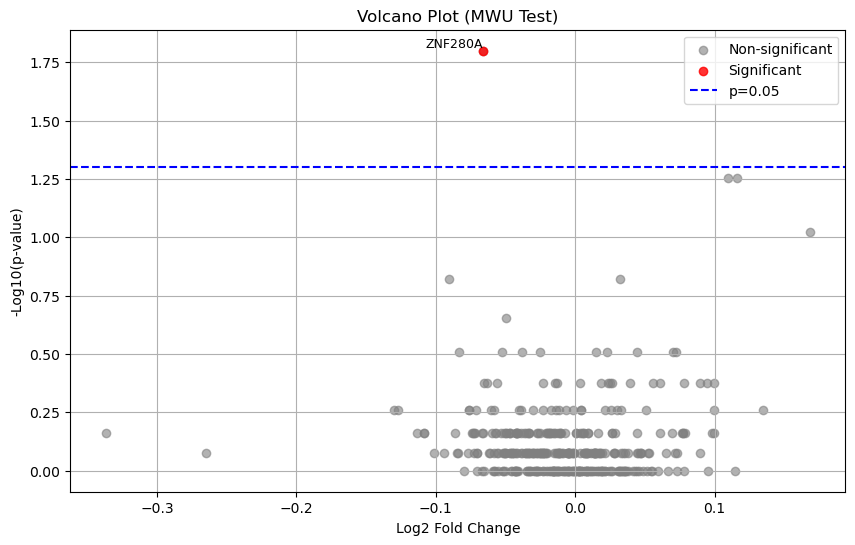

,Feature,MWU_statistic,p_value,log2_FC,negative_log10(p_value)
0,POU3F2,14.0,0.841270,0.052008,0.075065
1,TBP,14.0,0.841270,0.046268,0.075065
2,ERF,9.0,0.547619,-0.006746,0.261521
3,TWIST1,13.0,1.000000,-0.043300,-0.000000
4,SOX13,11.0,0.841270,-0.023000,0.075065


In [9]:
results_df = mwu_volcano_plot(Label_attached, target_col='target')

display(results_df.head())  # If running in Jupyter
results_df.to_csv(output_path, sep='\t',index=False)

In [10]:
print('done')

done
